In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
auto_data = pd.read_csv('auto-mpg.csv')
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


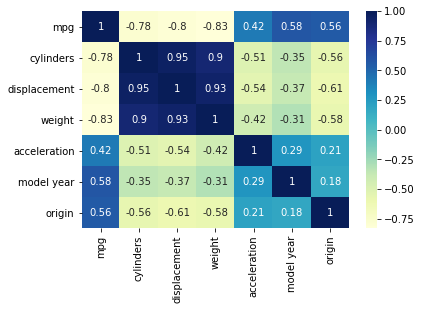

In [8]:
corr_df = auto_data.corr()
 
sns.heatmap(corr_df, cmap="YlGnBu", annot = True)
plt.show()

Text(0.5, 1.0, 'Cars weight v cars MPG')

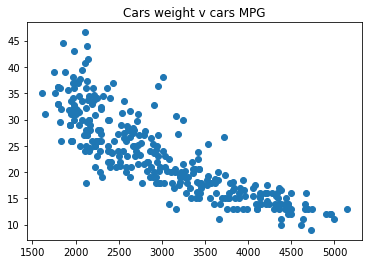

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
 
x = auto_data['weight']
y = auto_data['mpg']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
 
min_max_scaler = preprocessing.MinMaxScaler()
 
x_train_minmax = min_max_scaler.fit_transform(x_train.values.reshape(len(x_train),1))
y_train_minmax = min_max_scaler.fit_transform(y_train.values.reshape(len(y_train),1))
x_test_minmax = min_max_scaler.fit_transform(x_test.values.reshape(len(x_test),1))
y_test_minmax = min_max_scaler.fit_transform(y_test.values.reshape(len(y_test),1))
# df = pd.DataFrame(list)
plt.scatter(x_train, y_train)
plt.title('Cars weight v cars MPG')

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
 
model = Sequential([
    Dense(units=1, input_shape=(1,))
])
 
model.compile(loss=MeanSquaredError(), optimizer=RMSprop(learning_rate=0.01))
history = model.fit(x_train_minmax, y_train_minmax, epochs=100, verbose=False)

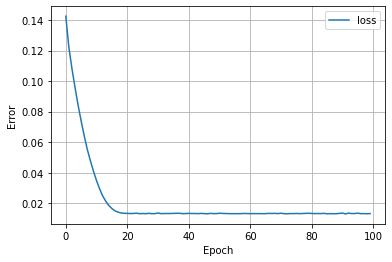

In [11]:
def plot_loss(history):
    
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)

In [12]:
x = np.array([[0.64]])
y_predict = model(x)
y_predict

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.20970955]], dtype=float32)>

In [14]:
import tensorflow_probability as tfp
import tensorflow as tf
tfd = tfp.distributions
tfpl = tfp.layers
 
model = Sequential([
  Dense(units=1+1, input_shape=(1,)),
  tfpl.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=tf.math.softplus(t[...,1:]))),
])

ModuleNotFoundError: No module named 'tensorflow_probability'